In [26]:
import numpy as np

In [27]:
def GF_table(bc_left: str, bc_right: str, L, truncation):
    # returns the eigenvalue beta_m and the norm Nx

    m = np.arange(1, truncation+1)
    if (bc_left == 'D' and bc_right == 'D'): #11
        beta_m = m*np.pi/L
        # X_m = np.sin(beta_m*x)
        Nx = L/2
        return beta_m, Nx
    
    if (bc_left == 'D' and bc_right == 'N'): #12
        beta_m = (2*m-1)*np.pi/(2*L)
        # X_m = np.sin(beta_m*x)
        Nx = L/2
        return beta_m, Nx
    
    if (bc_left == 'N' and bc_right == 'D'): #21
        beta_m = (2*m-1)*np.pi/(2*L)
        # X_m = np.sin(beta_m*x)
        Nx = L/2
        return beta_m, Nx
    

def GF_function(x, y, x_s, y_s, Lx, Ly, bc_e: str, bc_n: str, bc_w: str, bc_s: str, truncation = 50):
    # x = np.arange(0, Lx, step)
    # y = np.arange(0, Ly, step)
    beta_m, Nx = GF_table(bc_e, bc_w, Lx, truncation)
    theta_n, Ny = GF_table(bc_s, bc_n, Ly, truncation)
    summation_array = np.zeros(truncation*truncation)
    
    for m in range(1, truncation+1):
        i = m-1

        X_m = np.sin(x*beta_m[i])
        X_m_s = np.sin(x_s*beta_m[i])
        # print("X_m_s: " + str(X_m_s))
        for n in range(1, truncation+1):
            j= n-1

            Y_n = np.sin(y*theta_n[j])
            Y_n_s = np.sin(y_s*theta_n[j])
            # print("X_m_s: " + str(Y_n_s))

            fraction = 1/((beta_m[i]*beta_m[i]) + (theta_n[j]*theta_n[j]))
            X_mult = (X_m*X_m_s)/Nx
            Y_mult = (Y_n*Y_n_s)/Ny
            
            summation_array[i*truncation + j] = fraction * X_mult * Y_mult
    
    sum = np.sum(summation_array)
    return sum


def return_GF_matrix(x, y, x_s_start, x_s_end, y_s_start, y_s_end, Lx, Ly, bc_e: str, bc_n: str, bc_w: str, bc_s: str, n_step_s = 20):
    # returns GF as a function of x_s and y_s and for a specific x and y value
    step_s_x = (x_s_end-x_s_start)/n_step_s
    step_s_y = (y_s_end-y_s_start)/n_step_s

    x_s = np.arange(x_s_start, x_s_end, step_s_x)
    x_s[-1] = x_s_end # just to make sure we arrive to the border
    y_s = np.arange(y_s_start, y_s_end, step_s_y)
    y_s[-1] = y_s_end # just to make sure we arrive to the border

    GF_matrix = np.zeros((n_step_s, n_step_s))

    for i in range(n_step_s):
        for j in range(n_step_s):
            GF_matrix[i, j] = GF_function(x, y, x_s[i], y_s[j], Lx, Ly, bc_e=bc_e, bc_n=bc_n, bc_w=bc_w, bc_s=bc_s)

    return GF_matrix

In [29]:
Lx = Ly = 1
x_s = y_s = Lx/2
n_step = 2
step = 0.01 # limit might be after 0.01
# np.linspace(0, L/2, n_step, endpoint=True, retstep=False, dtype=None, axis=0)
# x_in = np.arange(0, L/2, step)
# x_out = np.arange(0, L/2, step)
# y_in = np.arange(0, L/2, step)
# y_out = np.arange(0, L/2, step)
x = np.arange(0, Lx, step)
y = np.arange(0, Ly, step)

GF_function(x[1], y[1], x_s, y_s, Lx, Ly, bc_e = "D", bc_n = "D", bc_w = "D", bc_s = "D")
# green_function(x, y, x_s, y_s, L, bc_e: str, bc_n: str, bc_w: str, bc_s: str, truncation = 10):

0.0001296981110708539

In [32]:
plot_GF = np.zeros((20, 20))
x = np.arange(0, Lx, 0.05)
y = np.arange(0, Ly, 0.05)
for i in range(20):
    for j in range(20):
        plot_GF[i, j] = GF_function(x[i], y[j], x_s, y_s, Lx, Ly, bc_e = "D", bc_n = "D", bc_w = "D", bc_s = "D")
        
    

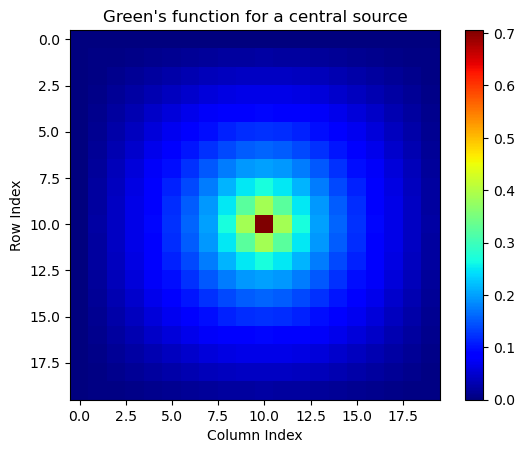

In [33]:
import matplotlib.pyplot as plt

# Plot the heatmap
plt.imshow(plot_GF, cmap='jet', interpolation='nearest')
plt.colorbar()  # Add a color bar to show the color scale
plt.title("Green's function for a central source")
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

In [17]:
omega = 5
lambda_v = 1
Lx = Ly = 1
n_step_s = 20

x = 0.2
y = 0.2

step_s_x = Lx/n_step_s
step_s_y = Ly/n_step_s
x_s = np.arange(0, Lx, step_s_x)
x_s[-1] = Lx # just to make sure we arrive to the border
y_s = np.arange(0, Ly, step_s_y)
y_s[-1] = Ly

GF_s = return_GF_matrix(x, y, 0, Lx, 0, Ly, "D", "D", "D", "D")

#integral over surface
integral_GF_ys = np.trapz(GF_s*omega, y_s, axis=0) #over y
integral_GF_ys_xs = np.trapz(integral_GF_ys, x_s) #over x

